In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv('C:\Data science\Abhikant Practice\Datasets\insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['bmi']=df['bmi'].round()

In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

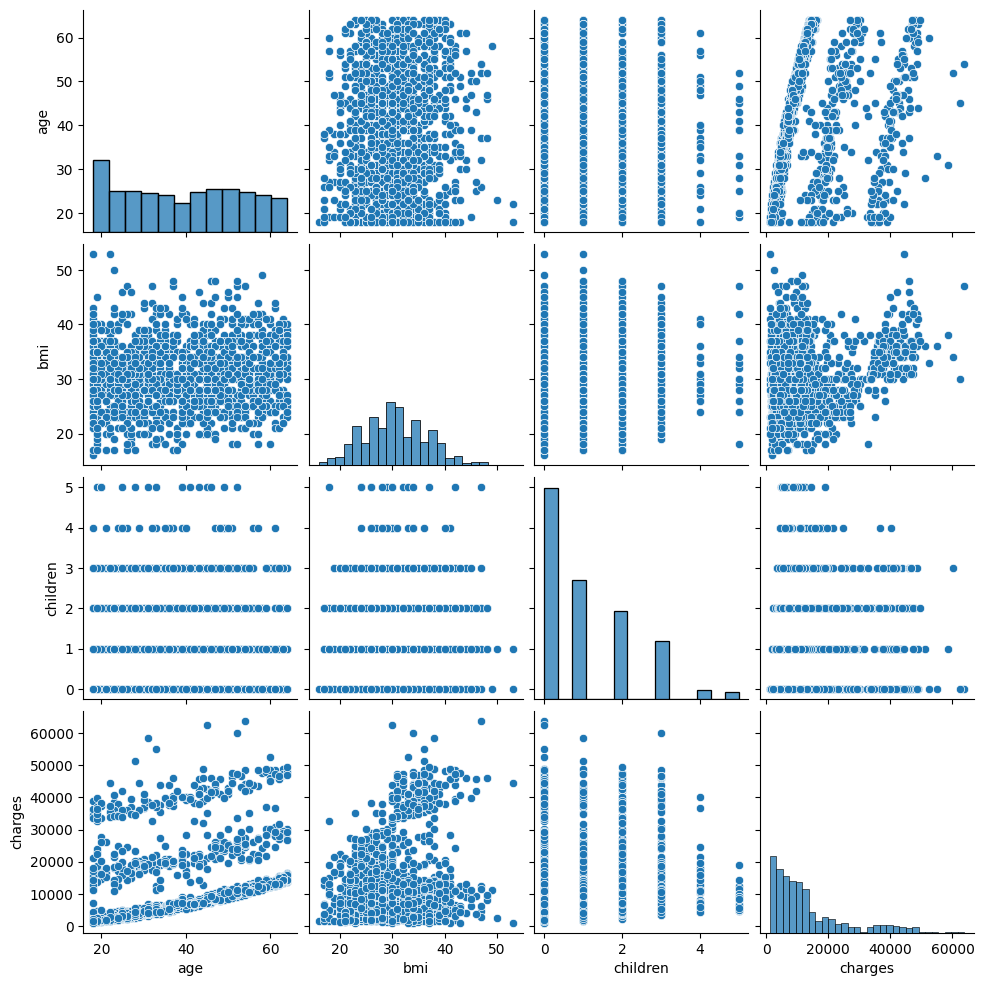

In [8]:
sns.pairplot(df)

In [9]:
df[(df.children==3) & (df.charges>50000)]

,age,sex,bmi,children,smoker,region,charges
1230,52,male,34.0,3,yes,northwest,60021.39897


In [10]:
df[(df.children==1) & (df.charges>50000)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.0,1,yes,southwest,51194.55914
577,31,female,38.0,1,yes,northeast,58571.07448


In [11]:
df[(df.children==5) & (df.charges>19000)]

,age,sex,bmi,children,smoker,region,charges
1085,39,female,18.0,5,yes,southwest,19023.26


In [12]:
df[(df.children==4) & (df.charges>25000)]

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.0,4,yes,southwest,40182.24600
1012,61,female,33.0,4,no,southeast,36580.28216


In [13]:
df.drop(index=[1230,34,577,1085,621,1012],inplace=True)

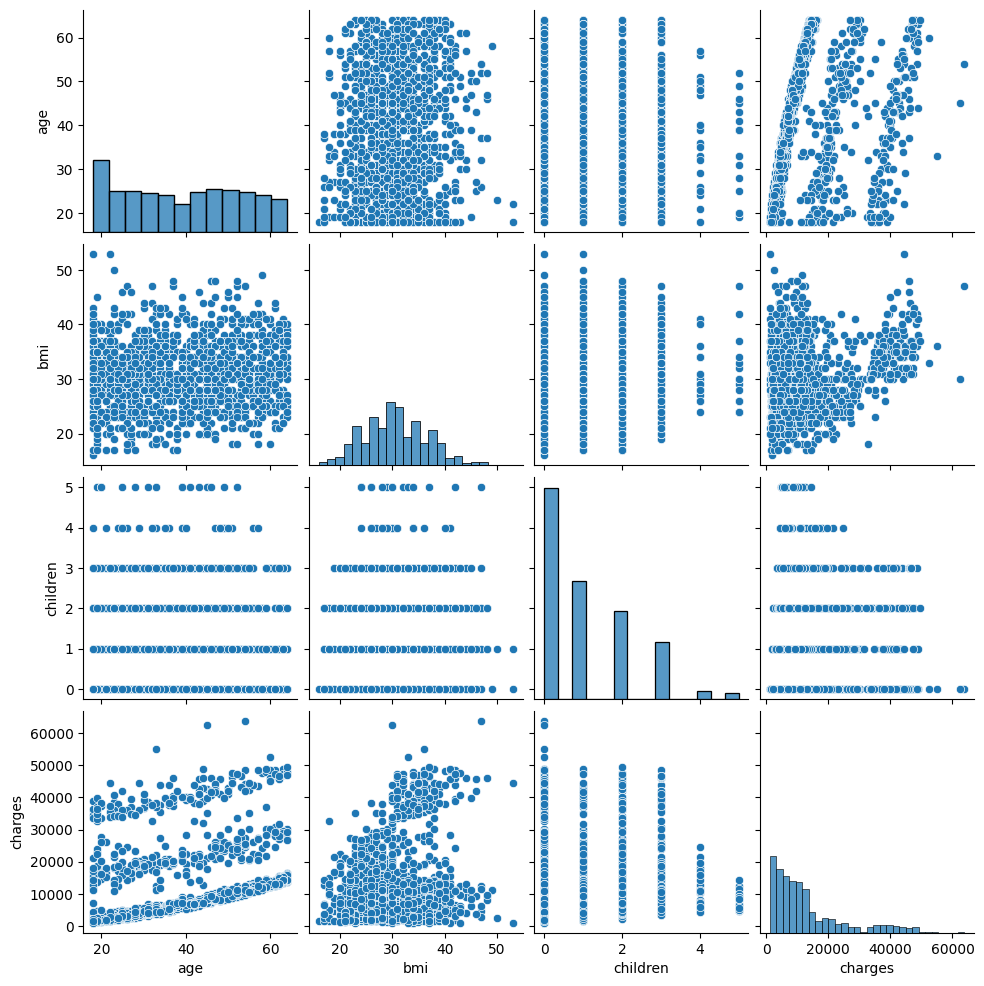

In [14]:
sns.pairplot(df)

In [15]:
df[(df.children==0) & (df.charges>60000)]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.0,0,yes,southeast,63770.42801
1300,45,male,30.0,0,yes,southeast,62592.87309


In [16]:
df.drop(index=[543,1300],inplace=True)
df.reset_index(drop=True,inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,28.0,0,yes,southwest,16884.92400
1,18,male,34.0,1,no,southeast,1725.55230
2,28,male,33.0,3,no,southeast,4449.46200
3,33,male,23.0,0,no,northwest,21984.47061
4,32,male,29.0,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1325,50,male,31.0,3,no,northwest,10600.54830
1326,18,female,32.0,0,no,northeast,2205.98080
1327,18,female,37.0,0,no,southeast,1629.83350
1328,21,female,26.0,0,no,southwest,2007.94500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   int64  
 4   smoker    1330 non-null   object 
 5   region    1330 non-null   object 
 6   charges   1330 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.9+ KB


In [18]:
df.bmi=df.bmi.astype(int)

In [19]:
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1325    10600.54830
1326     2205.98080
1327     1629.83350
1328     2007.94500
1329    29141.36030
Name: charges, Length: 1330, dtype: float64

In [20]:
df.charges=df.charges.round().astype(int)

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867
...,...,...,...,...,...,...,...
1325,50,male,31,3,no,northwest,10601
1326,18,female,32,0,no,northeast,2206
1327,18,female,37,0,no,southeast,1630
1328,21,female,26,0,no,southwest,2008


In [22]:
df1=df.copy(deep=True)

In [23]:
pd.get_dummies(df,columns=['sex'])

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,28,0,yes,southwest,16885,1,0
1,18,34,1,no,southeast,1726,0,1
2,28,33,3,no,southeast,4449,0,1
3,33,23,0,no,northwest,21984,0,1
4,32,29,0,no,northwest,3867,0,1
...,...,...,...,...,...,...,...,...
1325,50,31,3,no,northwest,10601,0,1
1326,18,32,0,no,northeast,2206,1,0
1327,18,37,0,no,southeast,1630,1,0
1328,21,26,0,no,southwest,2008,1,0


In [24]:
df=pd.get_dummies(df,columns=['sex'])

In [25]:
LaE=LabelEncoder()
df['region']=LaE.fit_transform(df['region'])
df

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,28,0,yes,3,16885,1,0
1,18,34,1,no,2,1726,0,1
2,28,33,3,no,2,4449,0,1
3,33,23,0,no,1,21984,0,1
4,32,29,0,no,1,3867,0,1
...,...,...,...,...,...,...,...,...
1325,50,31,3,no,1,10601,0,1
1326,18,32,0,no,0,2206,1,0
1327,18,37,0,no,2,1630,1,0
1328,21,26,0,no,3,2008,1,0


In [26]:
import category_encoders as ce

In [27]:
ohe=ce.OneHotEncoder(cols=['smoker'],return_df=True,use_cat_names=True)

In [28]:
df=ohe.fit_transform(df)
df

c:\Data science\Abhikant Practice\Deployment insurance model\insurance_regression\environment1\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,age,bmi,children,smoker_yes,smoker_no,region,charges,sex_female,sex_male
0,19,28,0,1,0,3,16885,1,0
1,18,34,1,0,1,2,1726,0,1
2,28,33,3,0,1,2,4449,0,1
3,33,23,0,0,1,1,21984,0,1
4,32,29,0,0,1,1,3867,0,1
...,...,...,...,...,...,...,...,...,...
1325,50,31,3,0,1,1,10601,0,1
1326,18,32,0,0,1,0,2206,1,0
1327,18,37,0,0,1,2,1630,1,0
1328,21,26,0,0,1,3,2008,1,0


In [29]:
df=df.iloc[:,[0,1,2,3,4,5,7,8,6]]
df

,age,bmi,children,smoker_yes,smoker_no,region,sex_female,sex_male,charges
0,19,28,0,1,0,3,1,0,16885
1,18,34,1,0,1,2,0,1,1726
2,28,33,3,0,1,2,0,1,4449
3,33,23,0,0,1,1,0,1,21984
4,32,29,0,0,1,1,0,1,3867
...,...,...,...,...,...,...,...,...,...
1325,50,31,3,0,1,1,0,1,10601
1326,18,32,0,0,1,0,1,0,2206
1327,18,37,0,0,1,2,1,0,1630
1328,21,26,0,0,1,3,1,0,2008


In [30]:
cols=df.columns
cols

Index(['age', 'bmi', 'children', 'smoker_yes', 'smoker_no', 'region',
       'sex_female', 'sex_male', 'charges'],
      dtype='object')

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df.iloc[:,:8]=mm.fit_transform(df.iloc[:,:8])
df=pd.DataFrame(df,columns=cols)
df

C:\Users\HOME\AppData\Local\Temp\ipykernel_2080\1449782501.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:8]=mm.fit_transform(df.iloc[:,:8])


,age,bmi,children,smoker_yes,smoker_no,region,sex_female,sex_male,charges
0,0.021739,0.324324,0.0,1.0,0.0,1.000000,1.0,0.0,16885
1,0.000000,0.486486,0.2,0.0,1.0,0.666667,0.0,1.0,1726
2,0.217391,0.459459,0.6,0.0,1.0,0.666667,0.0,1.0,4449
3,0.326087,0.189189,0.0,0.0,1.0,0.333333,0.0,1.0,21984
4,0.304348,0.351351,0.0,0.0,1.0,0.333333,0.0,1.0,3867
...,...,...,...,...,...,...,...,...,...
1325,0.695652,0.405405,0.6,0.0,1.0,0.333333,0.0,1.0,10601
1326,0.000000,0.432432,0.0,0.0,1.0,0.000000,1.0,0.0,2206
1327,0.000000,0.567568,0.0,0.0,1.0,0.666667,1.0,0.0,1630
1328,0.065217,0.270270,0.0,0.0,1.0,1.000000,1.0,0.0,2008


In [32]:
x=df.iloc[:,:8]
x

,age,bmi,children,smoker_yes,smoker_no,region,sex_female,sex_male
0,0.021739,0.324324,0.0,1.0,0.0,1.000000,1.0,0.0
1,0.000000,0.486486,0.2,0.0,1.0,0.666667,0.0,1.0
2,0.217391,0.459459,0.6,0.0,1.0,0.666667,0.0,1.0
3,0.326087,0.189189,0.0,0.0,1.0,0.333333,0.0,1.0
4,0.304348,0.351351,0.0,0.0,1.0,0.333333,0.0,1.0
...,...,...,...,...,...,...,...,...
1325,0.695652,0.405405,0.6,0.0,1.0,0.333333,0.0,1.0
1326,0.000000,0.432432,0.0,0.0,1.0,0.000000,1.0,0.0
1327,0.000000,0.567568,0.0,0.0,1.0,0.666667,1.0,0.0
1328,0.065217,0.270270,0.0,0.0,1.0,1.000000,1.0,0.0


In [33]:
y=df['charges']
y

0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1325    10601
1326     2206
1327     1630
1328     2008
1329    29141
Name: charges, Length: 1330, dtype: int32

In [34]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [35]:
score=[]
Lr=LinearRegression(n_jobs=4)
for i in range(df.shape[0]):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    Lr.fit(x_train,y_train)
    y_pred=Lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))
print('maximum r2_score ',max(score))
print('random state ',np.argmax(score))

maximum r2_score  0.8394615310068049
random state  1261


In [36]:
df.shape[0]

1330

In [37]:
# final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1261,test_size=0.2)
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
r2_score_final=r2_score(y_test,y_pred)
adjusted_r2_score=1- ((1-r2_score_final)*(x_test.shape[0]-1) / (x_test.shape[0]-x_test.shape[1]-1))
print("r2_score is: ",r2_score_final)
print("adjusted r2_score is: ",adjusted_r2_score)

r2_score is:  0.8394615310068049
adjusted r2_score is:  0.8344642245790012


In [38]:
#training accuracy
y_pred_train=Lr.predict(x_train)
r2_score_final_train=r2_score(y_train,y_pred_train)
adjusted_r2_score_train=1- ((1-r2_score_final_train)*(x_train.shape[0]-1) / (x_train.shape[0]-x_train.shape[1]-1))
print("r2_score_train is: ",r2_score_final)
print("adjusted r2_score_train is: ",adjusted_r2_score)

r2_score_train is:  0.8394615310068049
adjusted r2_score_train is:  0.8344642245790012


In [39]:
#new data testing
input1=pd.DataFrame(data=[[19,28,0,1,0,3,1,0]],columns=x.columns)
input1

,age,bmi,children,smoker_yes,smoker_no,region,sex_female,sex_male
0,19,28,0,1,0,3,1,0


In [40]:
mm1=mm.transform(input1)
mm1

array([[0.02173913, 0.32432432, 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        ]])

In [41]:
# actual data for same new input 
df[0:1]

,age,bmi,children,smoker_yes,smoker_no,region,sex_female,sex_male,charges
0,0.021739,0.324324,0.0,1.0,0.0,1.0,1.0,0.0,16885


In [42]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(mm,Lr)

In [43]:
pipe

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression(n_jobs=4))])

In [44]:
y_pred_input=pipe.predict(input1)
y_pred_input

c:\Data science\Abhikant Practice\Deployment insurance model\insurance_regression\environment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24544.])

In [45]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885
1,18,male,34,1,no,southeast,1726
2,28,male,33,3,no,southeast,4449
3,33,male,23,0,no,northwest,21984
4,32,male,29,0,no,northwest,3867
...,...,...,...,...,...,...,...
1325,50,male,31,3,no,northwest,10601
1326,18,female,32,0,no,northeast,2206
1327,18,female,37,0,no,southeast,1630
1328,21,female,26,0,no,southwest,2008


In [46]:
x1=df1.iloc[:,:-1]
x1

,age,sex,bmi,children,smoker,region
0,19,female,28,0,yes,southwest
1,18,male,34,1,no,southeast
2,28,male,33,3,no,southeast
3,33,male,23,0,no,northwest
4,32,male,29,0,no,northwest
...,...,...,...,...,...,...
1325,50,male,31,3,no,northwest
1326,18,female,32,0,no,northeast
1327,18,female,37,0,no,southeast
1328,21,female,26,0,no,southwest


In [47]:
y1=df1['charges']
y1

0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1325    10601
1326     2206
1327     1630
1328     2008
1329    29141
Name: charges, Length: 1330, dtype: int32

In [48]:
ce.OneHotEncoder()

OneHotEncoder()

In [49]:
ce.OrdinalEncoder

category_encoders.ordinal.OrdinalEncoder

In [54]:
#column transformer
from sklearn.compose import make_column_transformer,ColumnTransformer
#remainder='passthrough'

In [55]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

In [56]:
from sklearn.compose import ColumnTransformer

column_tr=ColumnTransformer(transformers=[
                                          ('OneHotEncoder', ce.OneHotEncoder(),['smoker']),
                                          ('OrdinalEncoding', ce.OrdinalEncoder(),['sex','region'])],
                            remainder='passthrough')

column_tr2=ColumnTransformer(transformers=[('scaling', StandardScaler(),[0,1,2,3,4,5,6])],
                            remainder='passthrough')


x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=1261,test_size=0.2)
Lr=LinearRegression()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_tr,column_tr2,Lr)

In [57]:
from sklearn import set_config

In [58]:
set_config(display='diagram')
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), ['smoker']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['sex', 'region'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('linearregression', LinearRegression())])

In [59]:
x_train1

,age,sex,bmi,children,smoker,region
740,50,male,26,0,no,northwest
581,19,male,21,0,no,southwest
863,57,male,44,1,no,southwest
1082,52,male,48,1,no,southeast
93,64,female,31,2,yes,southwest
...,...,...,...,...,...,...
889,47,male,39,2,yes,southeast
363,21,female,22,2,no,southeast
914,61,female,28,0,no,southwest
598,51,male,32,0,no,northwest


In [60]:
pipe.fit(x_train1,y_train1)

c:\Data science\Abhikant Practice\Deployment insurance model\insurance_regression\environment1\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), ['smoker']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(),
                                                  ['sex', 'region'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('linearregression', LinearRegression())])

In [61]:
y_pred_test1=pipe.predict(x_test1)
y_pred_test1

array([32607.36221188, 36592.09650514,  7543.81920066,  5967.69247923,
        7092.69747021,  3653.77645181,  7626.00779995,  5188.92029068,
       32715.79196558,  8043.75364466,  4865.72715718,  4283.86360879,
       12099.51229547, 12155.20024545, 10364.4284025 , 14701.66379162,
        7526.50732718, 29747.25690867, 11460.96270064, 13924.902463  ,
        7511.9300961 ,  1643.80830161,  5334.65917599,  9042.93716316,
       11427.00313233, 14380.55211873,  8352.72912875,   897.66797486,
        6895.93690786,  4405.02423072, 11612.20145828, 35033.49316103,
        3173.20792579,  2196.96781166,  2739.72225647,   548.73336854,
       17142.5474658 , 34409.30929344, 14209.44776152, 10805.11765158,
       12834.24403811, 15233.49833705,  5993.45037131, 30545.49127973,
        3941.89923674,  1201.63227134, 12322.27509226, 10839.23629457,
       14671.63746917,  6035.86695507,  3462.65841722,  5147.97406885,
        8340.97020758,  3789.43445952,  5939.23278326, 13869.06643521,
      

In [62]:
x_test1

,age,sex,bmi,children,smoker,region
83,37,female,35,2,yes,southwest
856,37,female,48,2,yes,southwest
165,20,female,37,5,no,southwest
1247,34,female,28,0,no,southeast
153,40,female,25,1,no,northeast
...,...,...,...,...,...,...
578,19,male,31,0,no,northwest
704,31,female,30,3,no,northeast
1239,45,female,26,3,no,southwest
940,62,male,40,0,no,southeast


In [63]:
input2=pd.DataFrame(data=[[19,'female',28,0,'yes','southwest']],columns=x1.columns)
input2

,age,sex,bmi,children,smoker,region
0,19,female,28,0,yes,southwest


In [64]:
#predicted value as per pipeline and input 2
y_pred_input1=pipe.predict(input2)
y_pred_input1

array([24929.68633902])

In [65]:
#actual value as per data row no 0
df1[0:1]

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,16885


In [66]:
import pickle
pickle.dump(pipe,open('insurance_regression.pkl','wb'))

In [67]:
pipe_new=pickle.load(open('insurance_regression.pkl','rb'))

In [68]:
pipe_new.predict(input2)

array([24929.68633902])